In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from zipfile import ZipFile
file='/content/drive/My Drive/Colab Notebooks/HappyHouse/happy-house-dataset.zip'

with ZipFile(file,'r')as zip:
  zip.extractall()
  print('Dome') 

Dome


In [0]:
import numpy as np
import pandas as pd
import h5py

from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,BatchNormalization

In [0]:
def load_dataset():
    train_data = h5py.File('train_happy.h5', "r")
    x_train = np.array(train_data["train_set_x"][:]) 
    y_train = np.array(train_data["train_set_y"][:]) 

    test_data = h5py.File('test_happy.h5', "r")
    x_test = np.array(test_data["test_set_x"][:])
    y_test = np.array(test_data["test_set_y"][:]) 
    
    y_train = y_train.reshape((1, y_train.shape[0]))
    y_test = y_test.reshape((1, y_test.shape[0]))
    
    return x_train, y_train, x_test, y_test

In [0]:
X_train,y_train,X_test,y_test=load_dataset()

In [48]:
X_train.shape

(600, 64, 64, 3)

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 1.0, '[0]')

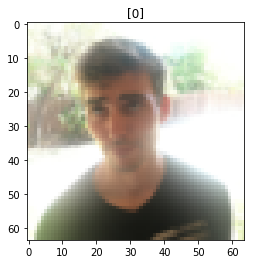

In [49]:
import cv2
index=325
import matplotlib.pyplot as plt
plt.imshow(X_train[index,:,:,:])
plt.title(y_train[:,index])


In [0]:
X_train=X_train/255
Y_train=y_train.T
X_test=X_test/255
Y_test=y_test.T

In [0]:
model=Sequential()
model.add(Conv2D(64,(5,5),padding='Same',activation='relu',input_shape=(64,64,3)))
# model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.1))

model.add(Conv2D(64,(5,5),padding='Same',activation='relu'))
# model.add(BatchNormalization())

model.add(MaxPooling2D(2,2))
model.add(Dropout(0.1))


model.add(Flatten())
model.add(Dense(128,activation='relu'))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


          

In [52]:
model.fit(X_train,Y_train,batch_size=32,validation_data=(X_test,Y_test),epochs=100)

Train on 600 samples, validate on 150 samples
Epoch 1/100
600/600 [==============================] - 2s 4ms/step - loss: 0.8892 - acc: 0.4817 - val_loss: 0.6909 - val_acc: 0.5667
Epoch 2/100
600/600 [==============================] - 1s 2ms/step - loss: 0.6777 - acc: 0.6300 - val_loss: 0.6880 - val_acc: 0.4867
Epoch 3/100
600/600 [==============================] - 1s 2ms/step - loss: 0.6274 - acc: 0.6317 - val_loss: 0.6406 - val_acc: 0.6133
Epoch 4/100
600/600 [==============================] - 1s 2ms/step - loss: 0.5066 - acc: 0.7433 - val_loss: 0.4903 - val_acc: 0.7333
Epoch 5/100
600/600 [==============================] - 1s 2ms/step - loss: 0.3973 - acc: 0.8017 - val_loss: 0.4917 - val_acc: 0.7067
Epoch 6/100
600/600 [==============================] - 1s 2ms/step - loss: 0.3193 - acc: 0.8617 - val_loss: 0.3179 - val_acc: 0.8533
Epoch 7/100
600/600 [==============================] - 1s 1ms/step - loss: 0.2830 - acc: 0.8817 - val_loss: 0.2598 - val_acc: 0.9067
Epoch 8/100
600/600 [==

In [0]:
model.save_weights('Happy.h5')
model.load_weights('drive/My Drive/Colab Notebooks/HappyHouse/Happy.h5')

That's a Happy Face


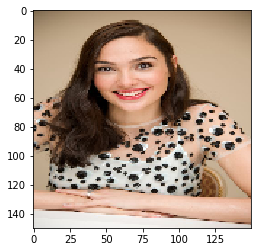

In [57]:
from keras.preprocessing import image
def prepare(filepath):
  
  img_size=64
  img_array=cv2.imread(filepath,cv2.IMREAD_COLOR)
  
  new_array=cv2.resize(img_array,(img_size,img_size))
  
  we=new_array.reshape(-1,img_size,img_size,3)
  
  
  return we

my_img='gal2.jpg'
prediction=model.predict([prepare(my_img)])

img = image.load_img(my_img, target_size=(150, 150))
plt.imshow(img)
if prediction[0] == 1:
  print("That's a Happy Face")
else:
  print("That's a Unhappy Face")
